In [2]:
# Import necessary libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap


In [3]:
## UNET data - finer resolution, spatial Y
ds_1 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Combined_Training_data_UNET/full_data.nc', chunks ='auto')


In [3]:
## CNN data - coarse resolution, binary regional Y
ds_2 = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/coarse_variable_data_files/train.nc', chunks ='auto')


In [4]:
newcolors = np.vstack((plt.get_cmap('Blues').reversed()(np.linspace(0, 1, 30)),np.ones((10,4)),
                       plt.get_cmap('Reds').reversed()(np.linspace(1, 0, 30))))
double = ListedColormap(newcolors, name='double')

In [5]:
#define function 
def show_sample(ds_sample):
    num_channels = len(ds_sample.n_channel)
    #define figure with 1 row and 5 columns. 
    fig,axes = plt.subplots(4,2,figsize=(25, 12))
    ax = axes.flatten() # Flatten 2x2 array so that you can use ax[0],ax[1],... rather than ax[0],ax[1]...
    fig.suptitle(str(ds_sample.time.values)[0:10]+' '+str(ds_sample.time.values)[11:13], fontsize = 20)
    #set the background to white, for some reason its transparent
    fig.set_facecolor('w')
    #loop over features (inputs)
    for i in range(num_channels):
        #plot images
        cf = ax[i].contourf(ds_sample.lon, ds_sample.lat, np.swapaxes(ds_sample.isel(n_channel = i).values, 0, 1),cmap=double, levels = np.arange(-4,4.5,.5), extend = 'both')
        ax[i].axis('off')
        ax[i].set_title(ds_sample.n_channel[i].values, fontsize = 18)
    cb = plt.colorbar(cf, ax =ax.ravel(),location='top', fraction = .05, shrink = 10,
                      ticks=[-4,-3,-2,-1, 0,1, 2,3,4],pad = .1,extendrect=True, aspect = 25, extend = 'both')



#     plt.savefig('/projects/reba1583/Research3/AntarcticAR_ML/Make_X_data/X_data_example.png', dpi = 300,facecolor = 'white', transparent=True, bbox_inches = 'tight') 


### One Timestep Example: Original Data

/projects/reba1583/software/anaconda/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


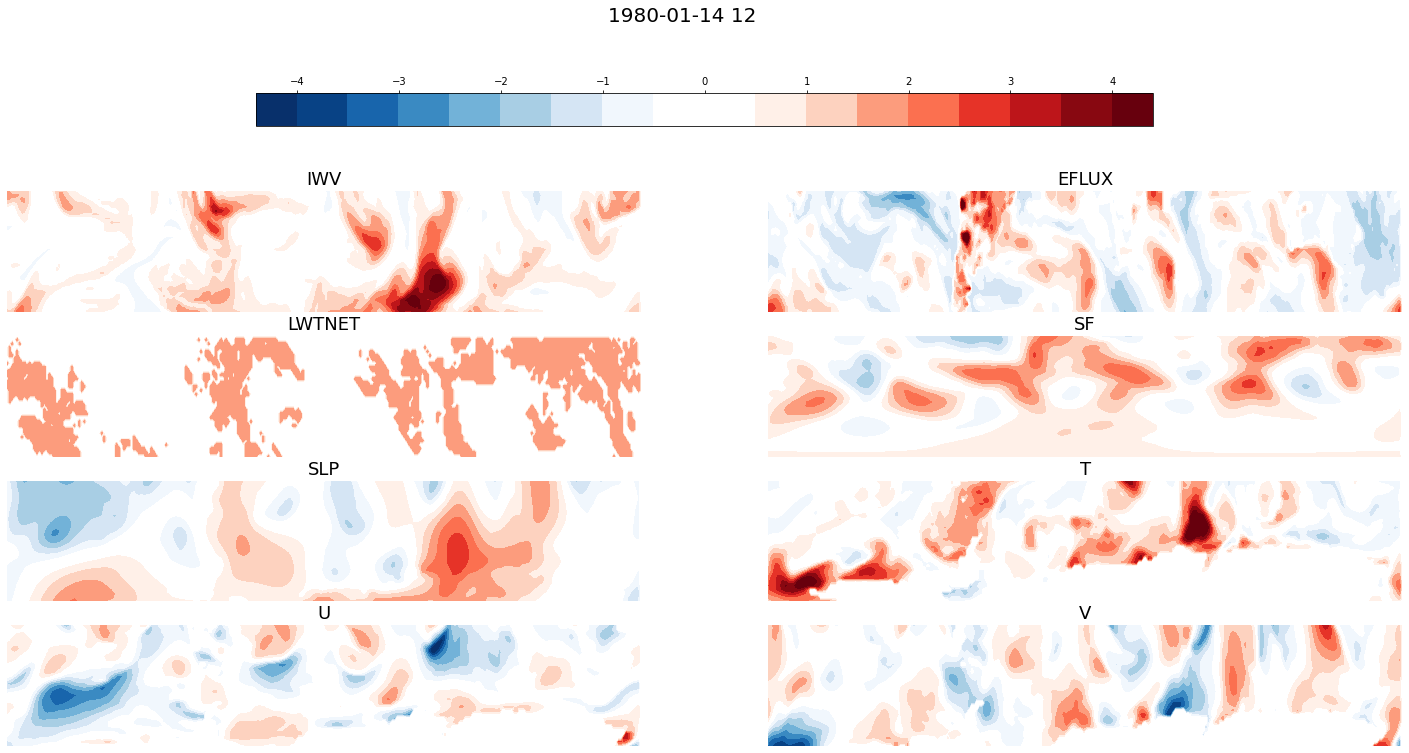

In [6]:
sample = ds_1.isel(time = 54).load()
show_sample(sample.features)